In [11]:
import seaborn as sns
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
df = sns.load_dataset('iris')

In [4]:
col = ['petal_length','petal_width']
X = df.loc[:,col]

In [5]:
speciesNum = {'setosa':0,'versicolor':1,'virginica':2}
df['tmp'] = df['species'].map(speciesNum)
y = df['tmp']

In [6]:
C = 1.0
clf = svm.SVC(kernel='linear',C=C)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
clf.predict([[6,2]])

array([2])

In [12]:
Xv= X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

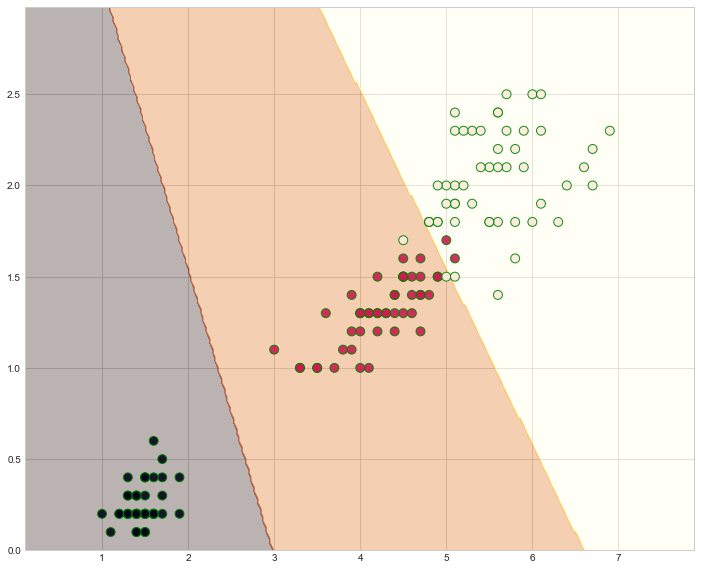

In [37]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(12,10))
fig = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3)
plt.scatter(X.values[:,0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g')
